In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("health_dataset.csv")
df.head()

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
0,22,21.5,118,0,3,0
1,35,27.8,132,1,1,1
2,41,29.4,140,0,2,1
3,29,23.1,120,0,3,0
4,52,31.8,150,1,1,1


In [ ]:
#data clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             139 non-null    int64  
 1   bmi             139 non-null    float64
 2   blood_pressure  139 non-null    int64  
 3   smoking_status  139 non-null    int64  
 4   activity_level  139 non-null    int64  
 5   disease_risk    139 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


In [4]:
df.describe()

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,42.848921,28.333094,137.510791,0.446043,1.899281,0.568345
std,10.061343,3.735715,14.251553,0.498878,0.810215,0.497098
min,22.000000,21.500000,116.000000,0.000000,1.000000,0.000000
25%,34.500000,25.000000,125.500000,0.000000,1.000000,0.000000
50%,42.000000,28.500000,136.000000,0.000000,2.000000,1.000000
75%,51.500000,31.200000,149.000000,1.000000,3.000000,1.000000
max,60.000000,35.100000,168.000000,1.000000,3.000000,1.000000


In [5]:
df.duplicated().sum()

np.int64(2)

In [6]:
df.isna().sum()

age               0
bmi               0
blood_pressure    0
smoking_status    0
activity_level    0
disease_risk      0
dtype: int64

In [7]:
df[df.duplicated()]

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
102,50,31.0,149,1,1,1
123,40,27.8,132,0,2,0


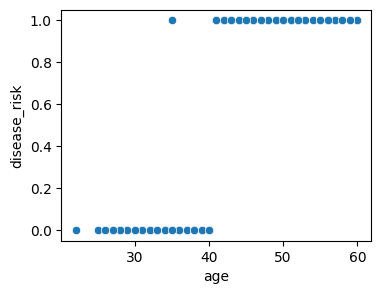

In [8]:
# data visualaization
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='disease_risk', data=df)
plt.show()

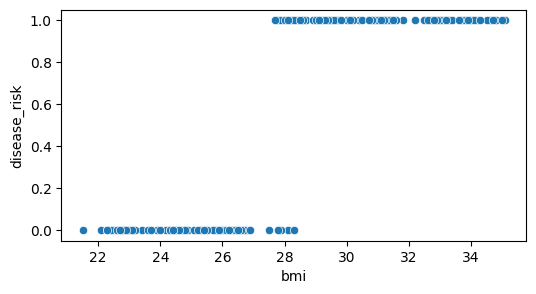

In [13]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='bmi', y='disease_risk', data=df)
plt.show()

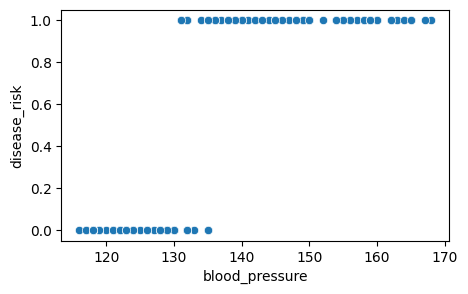

In [14]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='blood_pressure', y='disease_risk', data=df)
plt.show()

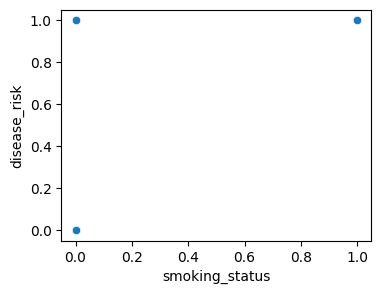

In [11]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='smoking_status', y='disease_risk', data=df)
plt.show()

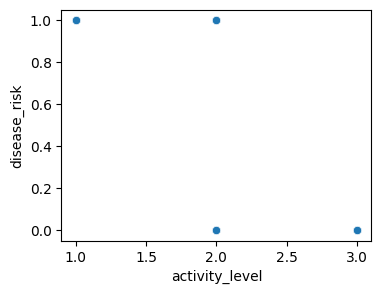

In [12]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='activity_level', y='disease_risk', data=df)
plt.show()

<Axes: xlabel='disease_risk'>

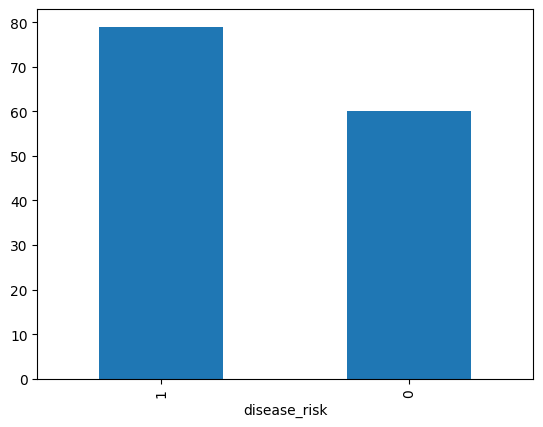

In [18]:
df['disease_risk'].value_counts().plot(kind='bar')

In [19]:
#feature target split
x = df[['age']]
y = df[['disease_risk']]

In [20]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,age
16,31
18,39
10,27
56,34
104,33


In [22]:
ytrain.head()

,disease_risk
16,0
18,0
10,0
56,0
104,0


In [23]:
xtest.head()

,age
135,38
66,35
31,32
118,57
42,40


In [24]:
ytest.head()

,disease_risk
135,0
66,0
31,0
118,1
42,0


In [25]:
#model implrmentation
lr = LinearRegression()

In [26]:
linear_model = lr.fit(xtrain, ytrain)

In [27]:
linear_model.score(xtrain, ytrain)

0.6930352248434661

In [28]:
linear_model.score(xtest, ytest)

0.6832303590659923

In [41]:
#slope
m = linear_model.coef_
m

array([[0.04105954]])

In [42]:
c = linear_model.coef_
c

array([[0.04105954]])

In [45]:
lin_pred_y = linear_model.predict(xtest)

In [46]:
lin_pred_y

array([[ 0.4015038 ],
       [ 0.27832518],
       [ 0.15514657],
       [ 1.18163501],
       [ 0.48362287],
       [ 0.31938472],
       [ 0.44256333],
       [ 1.14057547],
       [ 0.27832518],
       [ 0.56574195],
       [ 1.26375409],
       [ 0.0730275 ],
       [ 0.31938472],
       [ 1.30481362],
       [ 1.01739686],
       [ 0.0730275 ],
       [ 0.85315871],
       [ 1.09951593],
       [ 1.22269455],
       [ 0.97633732],
       [ 0.27832518],
       [ 0.23726565],
       [ 0.44256333],
       [ 0.97633732],
       [ 1.22269455],
       [ 0.36044426],
       [ 0.52468241],
       [-0.00909158]])

In [48]:
#mae 
mae = mean_absolute_error(xtest, lin_pred_y)
mae

42.804172999764816

In [49]:
mse = mean_squared_error(xtest, lin_pred_y)
mse

1929.3710413940478

In [50]:
r2 = r2_score(xtest, lin_pred_y)
r2

-17.257856513771408

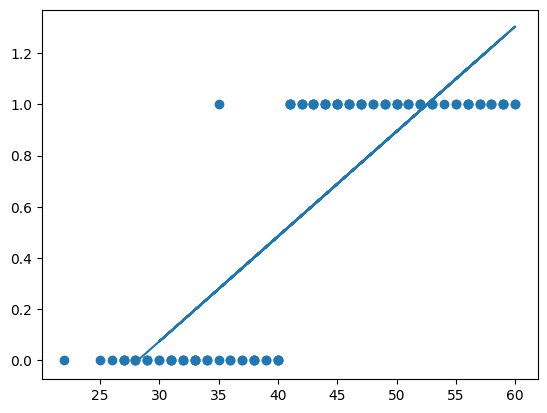

In [55]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, lin_pred_y)
plt.show()

end of linear regression but it not legal in cetagoriacl type data

In [51]:
#logistic regression
log = LogisticRegression()

In [52]:
log_model = log.fit(xtrain, ytrain)
log_model

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
log_model.score(xtrain, ytrain)

0.990990990990991

In [57]:
log_model.score(xtest, ytest)

1.0

In [58]:
log_pred_y = log_model.predict(xtest)

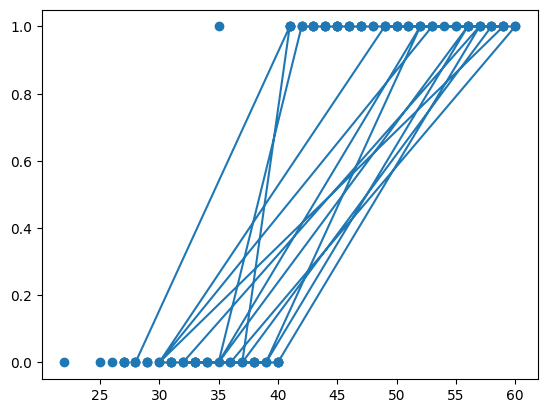

In [59]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, log_pred_y)
plt.show()